In [1]:
!pip install sodapy
!pip install plotly

In [3]:
import pandas as pd
import json
import plotly.express as px
import plotly.io as pio
pio.renderers.default = 'firefox'
chicago_areas = json.load(open("Boundaries - Community Areas (current).geojson", 'r'))
area_id_map = {}
for feature in chicago_areas['features']:
    feature['id'] = feature['properties']['area_numbe']
    area_id_map[feature['properties']['area_numbe']] = feature['id'];


In [21]:
# Snippet from: https://dev.socrata.com/foundry/data.cityofchicago.org/d62x-nvdr
from sodapy import Socrata
# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("data.cityofchicago.org", None)

# Example authenticated client (needed for non-public datasets):
# client = Socrata(data.cityofchicago.org,
#                  MyAppToken,
#                  userame="user@example.com",
#                  password="AFakePassword")

# results returned as JSON from API / converted to Python list of
# dictionaries by sodapy.

from_2020 = "qzdf-xmn8"
from_2019 = "w98m-zvie"
from_2018 = "3i3m-jwuy"
from_2017 = "d62x-nvdr"
crimes = client.get(from_2020, limit=500)

# Convert to pandas DataFrame
crimes_df = pd.DataFrame.from_records(crimes)

# Population of Chicago 2020 = 2694240 

In [66]:
Homicide = crimes_df[crimes_df['primary_type'] == 'HOMICIDE']
Homicide_lat = Homicide['latitude']
Homicide_lon = Homicide['longitude']
Homicide_loc = list(zip(Homicide_lat, Homicide_lon))
 
crimes_2020_df = crimes_df
crime_type = []
time = []
dates = crimes_2020_df['date']
primary_type = crimes_2020_df['primary_type']
for date in dates:
    time.append(date.split('T')[1])
    
print(crimes_df)




                        date district                      block  \
0    2020-11-09T23:50:00.000      020         021XX W FOSTER AVE   
1    2020-11-09T23:50:00.000      004   091XX S STONY ISLAND AVE   
2    2020-11-09T23:47:00.000      002         034XX S RHODES AVE   
3    2020-11-09T23:45:00.000      015        049XX W CHICAGO AVE   
4    2020-11-09T23:43:00.000      010       016XX S ST LOUIS AVE   
..                       ...      ...                        ...   
495  2020-11-09T03:46:00.000      024           014XX W LUNT AVE   
496  2020-11-09T03:35:00.000      012      012XX W WASHBURNE AVE   
497  2020-11-09T03:30:00.000      006  085XX S COTTAGE GROVE AVE   
498  2020-11-09T03:23:00.000      019        010XX W BELMONT AVE   
499  2020-11-09T03:20:00.000      020         027XX W GREGORY ST   

                       description     location_description  \
0                   FORCIBLE ENTRY  SCHOOL - PUBLIC GROUNDS   
1    UNLAWFUL POSSESSION - HANDGUN              GAS STATI

In [7]:
# Separate nonviolent from violent
violent =     ['BATTERY', 'ROBBERY', 'OFFENSE INVOLVING CHILDREN', 
               'INTERFERENCE WITH PUBLIC OFFICER', 'STALKING', 'KIDNAPPING', 
               'ARSON', 'CRIMINAL SEXUAL ASSAULT', 'SEX OFFENSE', 
               'CONCEALED CARRY LICENSE VIOLATION', 'INTIMIDATION', 'HOMICIDE' ]

# "non-violent" 
non_violent = ['BURGLARY', 'THEFT', 'CRIMINAL DAMAGE', 'NARCOTICS',
               'DECEPTIVE PRACTICE', 'CRIMINAL TRESPASS', 
               'PUBLIC PEACE VIOLATION', 'MOTOR VEHICLE THEFT', 'LIQUOR LAW VIOLATION', 
               'OBSCENITY', 'PROSTITUTION', 'PUBLIC INDECENCY']

In [8]:
fig = px.choropleth(crimes_df, locations='id', geojson=chicago_areas, color="community_area")
fig.show()

Error: could not locate runnable browser

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("C:\\Users\\Tony\\Downloads\\Crimes_-_2001_to_Present.csv")

C:\Users\Tony\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (21) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
data.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,11034701,JA366925,01/01/2001 11:00:00 AM,016XX E 86TH PL,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,...,8.0,45.0,11,NaN,NaN,2001,08/05/2017 03:50:08 PM,NaN,NaN,NaN
1,11227287,JB147188,10/08/2017 03:00:00 AM,092XX S RACINE AVE,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,RESIDENCE,False,False,...,21.0,73.0,02,NaN,NaN,2017,02/11/2018 03:57:41 PM,NaN,NaN,NaN
2,11227583,JB147595,03/28/2017 02:00:00 PM,026XX W 79TH ST,0620,BURGLARY,UNLAWFUL ENTRY,OTHER,False,False,...,18.0,70.0,05,NaN,NaN,2017,02/11/2018 03:57:41 PM,NaN,NaN,NaN
3,11227293,JB147230,09/09/2017 08:17:00 PM,060XX S EBERHART AVE,0810,THEFT,OVER $500,RESIDENCE,False,False,...,20.0,42.0,06,NaN,NaN,2017,02/11/2018 03:57:41 PM,NaN,NaN,NaN
4,11227634,JB147599,08/26/2017 10:00:00 AM,001XX W RANDOLPH ST,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,HOTEL/MOTEL,False,False,...,42.0,32.0,02,NaN,NaN,2017,02/11/2018 03:57:41 PM,NaN,NaN,NaN


In [4]:
df = data[data['Latitude'].notna()]
df = df[df['Longitude'].notna()]


In [5]:
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
63291,11665567,JC234307,04/10/2019 04:37:00 PM,102XX S VERNON AVE,1562,SEX OFFENSE,AGGRAVATED CRIMINAL SEXUAL ABUSE,SCHOOL - PUBLIC BUILDING,False,False,...,9.0,49.0,17,1181051.0,1837225.0,2019,04/17/2020 03:50:24 PM,41.708589,-87.612583,"(41.708589, -87.612583094)"
63376,11667963,JC235212,04/12/2019 04:08:00 PM,032XX N KEELER AVE,1754,OFFENSE INVOLVING CHILDREN,AGG SEX ASSLT OF CHILD FAM MBR,RESIDENCE,False,True,...,30.0,16.0,02,1147835.0,1921408.0,2019,10/02/2019 04:13:24 PM,41.940298,-87.732066,"(41.940297617, -87.732066473)"
63377,11667968,JC237058,04/19/2019 01:57:00 PM,002XX N LARAMIE AVE,1752,OFFENSE INVOLVING CHILDREN,AGGRAVATED CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER,RESIDENCE,False,True,...,28.0,25.0,17,1141669.0,1901165.0,2019,03/18/2020 03:52:17 PM,41.884865,-87.755230,"(41.884865037, -87.755230327)"
63453,11668309,JC238187,04/25/2019 05:20:00 PM,108XX S DR MARTIN LUTHER KING JR DR,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,...,9.0,49.0,08B,1180832.0,1833222.0,2019,06/30/2019 03:56:27 PM,41.697609,-87.613508,"(41.697609261, -87.613507612)"
63857,11692179,JC261724,05/13/2019 05:26:00 PM,090XX S RACINE AVE,0560,ASSAULT,SIMPLE,STREET,False,False,...,21.0,73.0,08A,1169908.0,1844927.0,2019,06/30/2019 03:56:27 PM,41.729973,-87.653167,"(41.729973132, -87.653166753)"


In [6]:
print(df['Longitude'].min())

BBox = ((-87.7738,   -87.5658, 41.8096, 41.9653))

print(BBox)

-91.686565684
(-87.7738, -87.5658, 41.8096, 41.9653)


In [56]:
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button, RadioButtons

In [60]:
chicagoMap = plt.imread('D:\Classes\CSCE320\Project\ChicagoCrimeAnalysis\Location_map_Chicago.png')

fig, ax = plt.subplots(figsize = (8,7))

ax.scatter(df['Longitude'],df['Latitude'], zorder=1, alpha=0.2,c='b',s=10)


ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])



ax.imshow(chicagoMap, zorder=0, extent = BBox, aspect= 'equal')

FileNotFoundError: [Errno 2] No such file or directory: 'D:\\Classes\\CSCE320\\Project\\ChicagoCrimeAnalysis\\Location_map_Chicago.png'

In [25]:
from ipywidgets import IntSlider
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets


[[ 0.  0.  0. ...  1.  0.  0.]
 [ 0.  0.  0. ... 46.  0.  0.]
 [ 0.  0.  0. ... 33.  0.  0.]
 ...
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  2. ...  0.  0.  0.]
 [33.  0.  0. ...  0.  0.  0.]]


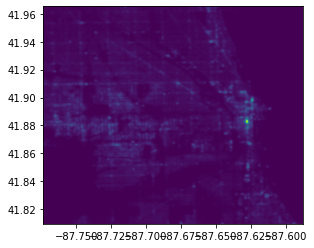

In [26]:
import numpy as np
import matplotlib.cm as cm
from scipy.ndimage.filters import gaussian_filter
import matplotlib.pyplot as plt
%matplotlib inline

df = df[df['Latitude']>41.8096]
df = df[df['Latitude']<41.9653]
df = df[df['Longitude']>-87.7738]
df = df[df['Longitude']<-87.5658]

y = df.loc[:, 'Latitude'].tolist()
x = df.loc[:, 'Longitude'].tolist()

heatmap, xedges, yedges = np.histogram2d(x,y,bins=1000)
print(heatmap)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
heatmap = gaussian_filter(heatmap, sigma=4)

plt.clf()
plt.imshow(heatmap.T, extent=extent, origin='lower')
plt.show()

In [61]:
opt = []

types = ['All']
types += data['Primary Type'].value_counts().index.tolist()



df['Month'] = df['Date'].apply(lambda x: int(x.split("/")[0]))
df['Day'] = df ['Date'].apply(lambda x: int(x.split("/")[1]))
print(df)

               ID Case Number                    Date                 Block  \
63376    11667963    JC235212  04/12/2019 04:08:00 PM    032XX N KEELER AVE   
63377    11667968    JC237058  04/19/2019 01:57:00 PM   002XX N LARAMIE AVE   
63887    11690557    JC266361  05/15/2019 10:30:00 PM       026XX W IOWA ST   
63903    11694464    JC271999  05/14/2019 10:00:00 AM  021XX S ST LOUIS AVE   
63919    11676085    JC249714  05/04/2019 02:00:00 PM    001XX E PEARSON ST   
...           ...         ...                     ...                   ...   
7221318   9999999    HY189683  03/18/2015 05:08:00 PM   043XX N CENTRAL AVE   
7221319  11700037    JC278815  05/26/2019 12:10:00 AM   046XX W MC LEAN AVE   
7221321  11700926    JC279725  05/26/2019 05:13:00 PM  036XX W DOUGLAS BLVD   
7221322     24560    JC279072  05/26/2019 06:48:00 AM   013XX W HASTINGS ST   
7221325     24559    JC278908  05/26/2019 02:11:00 AM   013XX W HASTINGS ST   

         IUCR                Primary Type  \
63376 

In [66]:
opt =[]
for i in range(2001,2021):
    opt.append(str(i))

In [88]:

optMonth = ['none']
optDay = ['none']
for i in range (1, 31):
    optDay.append(str(i))
    if (i < 13):
        optMonth.append(str(i))
    
typeDrop = widgets.Dropdown(
    options=types,
    value='All',
    description='Type:'
)

monthDrop = widgets.Dropdown (
    options= optMonth,
    value='none',
    description='Month:'
)

drop = widgets.Dropdown(
    options=opt,
    value='2019',
    description='Year:'
)

drop2 = widgets.Dropdown(
    options=opt,
    value='2020',
    description='Year:'
)


yr1 = drop
month = monthDrop
cmpr = widgets.Checkbox(description='Compare')
yr2 = drop2
ui = widgets.HBox([typeDrop, month, yr1, cmpr,yr2])

def f(typeOf, month, year1, compare, year2):
    
    dfYear = df[df['Year'] == int(year1)]
    
    if typeOf != 'All':
            dfYear = dfYear[dfYear['Primary Type'] == typeOf]
    if month != 'none':
            dfYear = dfYear[dfYear['Month'] == int(month)]

    crime_types = dfYear['Primary Type'].value_counts().index.tolist()
    crime_types_count = dfYear['Primary Type'].value_counts()
    
    title = year1 + " Type of Crime"
    
    if compare == True:

        title = year1 + " vs. " + year2+" Type of Crime"
        dfYear2 = df[df['Year'] == int(year2)]
        
        if typeOf != 'All':
            dfYear2 = dfYear2[dfYear2['Primary Type'] == typeOf]
            
        crime_types2 = dfYear2['Primary Type'].value_counts().index.tolist()
        crime_types_count2 = dfYear2['Primary Type'].value_counts()
        
        fig,ax = plt.subplots(figsize=(8,7))
        ax.set_title(title)
        ax.barh(crime_types,crime_types_count,color = 'b',label=year1)
        ax.barh(crime_types2,crime_types_count2,color = 'r',label=year2)
#         ax.set_xticks(rotation=0)
        ax.invert_yaxis()
        ax.legend(loc='lower right')
        plt.show()
    else:

        plt.figure(figsize=(8,7))
        plt.title(title)
        plt.barh(crime_types,crime_types_count)
        plt.xticks(rotation=0)
        plt.gca().invert_yaxis()
        for index, value in enumerate(crime_types_count):
            plt.text(value, index, str(value))
        plt.show()
    
#     if compare == True:
#         interact(f, year1=drop, compare=False,year2)

    
#interact(f, year=drop, compare=False)
out = widgets.interactive_output(f, {'typeOf': typeDrop, 'month': month, 'year1': yr1, 'compare' : cmpr, 'year2':yr2})


display(ui,out)

Output()

In [56]:
# Snippet from: https://dev.socrata.com/foundry/data.cityofchicago.org/d62x-nvdr
from sodapy import Socrata
# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("data.cityofchicago.org", None)

# Example authenticated client (needed for non-public datasets):
# client = Socrata(data.cityofchicago.org,
#                  MyAppToken,
#                  userame="user@example.com",
#                  password="AFakePassword")

# results returned as JSON from API / converted to Python list of
# dictionaries by sodapy.



# Convert to pandas DataFrame
crimes_df = pd.DataFrame.from_records(crimes)

# Population of Chicago 2020 = 2694240

In [86]:

drop = widgets.Dropdown(
    options=opt,
    value='2019',
    description='Year:'
)
drop2 = widgets.Dropdown(
    options=optMonth,
    value='none',
    description='Month:'
)
year = drop
month = drop2
ui = widgets.HBox([year, month])

def f2(year, month):
    dfYear = df[df['Year'] == int(year)]
    month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

    if (month == 'none') :
        count = []
        for i in range(1,13):
            dfMonth = dfYear[dfYear['Month'] == i]

    #     crime_types = dfMonth['Primary Type'].value_counts().index.tolist()
            total_count = sum(dfMonth['Primary Type'].value_counts().tolist())
            count.append(total_count)
        
        
        title = "total crime per month in " + year
        plt.figure(figsize=(8,7))
        plt.title(title)
        plt.barh(month_names,count)
        plt.xticks(rotation=0)
        plt.gca().invert_yaxis()
        for index, value in enumerate(count):
            plt.text(value, index, str(value))
        plt.show()
    else :
        dfMonth = dfYear[dfYear['Month'] == int(month)]
        bday = dfMonth['Day'].unique().max()
        count = []
        days = []
        for i in range(1, bday + 1):
            days.append(str(i))
            dfDay = dfMonth[dfMonth['Day'] == i]
            total_count = sum(dfDay['Primary Type'].value_counts().tolist())
            count.append(total_count)
        title = "total crime per day in " + month_names[int(month) - 1] + ", " +  year
        plt.figure(figsize=(8,7))
        plt.title(title)
        plt.barh(days,count)
        plt.xticks(rotation=0)
        plt.gca().invert_yaxis()
        for index, value in enumerate(count):
            plt.text(value, index, str(value))
        plt.show()

out = widgets.interactive_output(f2, {'year': year, 'month': month})
display(ui,out)


Output()